# Q1

## Part A

In [1]:
from copy import deepcopy
from sklearn.preprocessing import normalize
from sklearn.datasets import load_breast_cancer
import numpy as np

In [2]:

def sigmoid(z):
  # print(z)
  return 1 / (1 + np.exp(-z))
def accuracy(y_hat,y):
  count=0
  for i in range(len(y_hat)):
    temp=0
    if y_hat[i]>0.5:
      temp=1
    if temp==y[i]:
      count+=1
  return count/len(y_hat)

In [3]:
 class logisticregression():
  def __init__(self,intercept=True):
    self.thetas=None
    self.intercept=intercept
    pass
  def fit(self, X, y):
      # if self.intercept:
      X=np.append(np.ones((X.shape[0],1)),X,axis=1)
      # X=normalize(X)
      alpha=0.05
      self.thetas  = np.zeros((X.shape[1]))
      for i in range(1000):
          linear_prediction = np.dot(X, self.thetas)
          y_hat=sigmoid(linear_prediction)
          self.thetas -= (1/len(X))*alpha*np.dot(X.T, y_hat-y)
      # print(self.thetas)
  def predict(self, X):
      # if self.intercept:
      X=np.append(np.ones((X.shape[0],1)),X,axis=1)

      # X=normalize(X)
      return sigmoid(np.dot(X, self.thetas))
  def get_theta(self):
    return self.thetas


In [4]:
data=load_breast_cancer()
y = data.target
x = data.data
x.shape
from sklearn.model_selection import train_test_split
# import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
model=logisticregression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [6]:
y_hat=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [7]:
accuracy(y_hat,y_test)

0.9473684210526315

## Part B

In [8]:
from autograd import grad
from sklearn.model_selection import KFold
import autograd.numpy as npy

In [9]:
def sigmoid_b(z):
  # print(z)
  return 1 / (1 + npy.exp(-z))

In [10]:
def loss1(theta,X,y):
      X_ = npy.matmul(X,theta)
      s = sigmoid_b(X_)
      result = -(1/y.size)* (npy.sum(npy.multiply(y,npy.log(s))+npy.multiply(1-y,npy.log(1-s))))
      return result

In [11]:
class logisticregression_b():
  def __init__(self):
    self.thetas=None
    pass
  def fit(self, X, y):
      X=npy.append(npy.ones((X.shape[0],1)),X,axis=1)
      X=normalize(X)
      alpha=0.05
      self.thetas  = npy.zeros((X.shape[1]))
      a=grad(loss1)
      for i in range(1000):
          self.thetas -= alpha*a(self.thetas,X,y)
  def predict(self, X):
      X=np.append(np.ones((X.shape[0],1)),X,axis=1)
      X=normalize(X)
      return sigmoid(npy.dot(X, self.thetas))

In [12]:
data=load_breast_cancer()
y = data.target
x = data.data
x.shape
# import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
model=logisticregression_b()
model.fit(x_train,y_train)

In [14]:
y_hat=model.predict(x_test)

In [15]:
accuracy(y_hat,y_test)

0.631578947368421

## Part C

In [16]:
data=load_breast_cancer()
y = data.target
x = data.data
x.shape

(569, 30)

In [17]:
kf3 = KFold(n_splits=3, shuffle=False)

In [18]:

model=logisticregression()
for train_index, test_index in kf3.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model.fit(x_train,y_train)
    y_hat=model.predict(x_test)
    print(accuracy(y_hat,y_test))
print("For grad")
model_b=logisticregression_b()
for train_index, test_index in kf3.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model_b.fit(x_train,y_train)
    y_hat=model_b.predict(x_test)
    print(accuracy(y_hat,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.9157894736842105
0.8947368421052632
0.7566137566137566
For grad
0.48947368421052634
0.6210526315789474
0.7777777777777778


## Part 4

In [19]:
import pandas as pd

In [20]:
data=load_breast_cancer()
y = data.target
x = data.data
x=pd.DataFrame(x)
x_=pd.DataFrame()

In [21]:
x_=pd.DataFrame(x_)
x_[1]=x[2]
x_[0]=x[1]
x_=np.array(x_)
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.2)


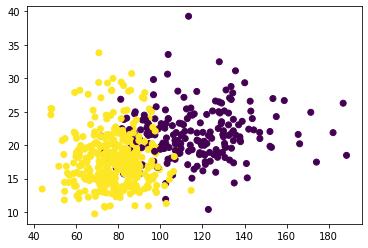

In [22]:
import matplotlib.pyplot as plt
x_=pd.DataFrame(x_)
plt.scatter(x_[0],x_[1],c=y)

In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
l=LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_hat=l.predict(x_test)
accuracy_score(y_test,y_hat)

0.8421052631578947

In [25]:
model=logisticregression()
model.fit(x_train,y_train)
y_hat=model.predict(x_test)
print(accuracy(y_hat,y_test))


0.6403508771929824


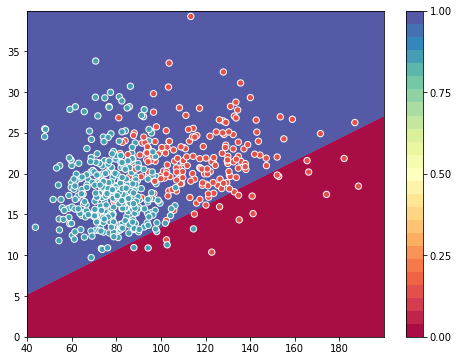

In [26]:
xx, yy = np.mgrid[ 40:200:.01,0:40:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
outputs =model.predict(grid)
for i in range(len(outputs)):
  if outputs[i]>0.5:
    outputs[i]=1
  else:
    outputs[i]=0
outputs= outputs.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, outputs, 25, cmap=plt.cm.Spectral,vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(x_[0], x_[1], c=y[:], s=40, vmin=-.2,cmap=plt.cm.Spectral, vmax=1.2,edgecolor="white", linewidth=1)